## CNN 卷積神經網路

* 影像的特徵提取: 透過 Convolution 與 Max Pooling 提取影像特徵.
* Fully connected Feedforward network: Flatten layers, hidden layers and output layers

http://puremonkey2010.blogspot.com/2017/07/toolkit-keras-mnist-cnn.html

## STEP1. 資料讀取與轉換 

In [2]:
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np  
np.random.seed(10)  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  
  
# Translation of data  
X_Train4D = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test4D = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32') 

Using TensorFlow backend.


## STEP2. 將 Features 進行標準化與 Label 的 Onehot encoding 

In [3]:
# Standardize feature data  
X_Train4D_norm = X_Train4D / 255  
X_Test4D_norm = X_Test4D /255  
  
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)  
y_TestOneHot = np_utils.to_categorical(y_Test) 

## STEP3. 建立卷積層與池化層

In [4]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
  
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))


Instructions for updating:
Colocations handled automatically by placer.


## STEP4. 建立神經網路 

In [5]:
# Add Dropout layer  
model.add(Dropout(0.25))  
model.add(Flatten())  
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='softmax'))  
model.summary()  
print("")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
___________________________

## STEP5. 定義訓練並進行訓練 

In [7]:
from keras import optimizers

# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 開始訓練  
train_history = model.fit(x=X_Train4D_norm,y=y_TrainOneHot, validation_split=0.2,epochs=2, batch_size=300, verbose=1) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 37s 764us/step - loss: 0.1391 - acc: 0.9590 - val_loss: 0.0655 - val_acc: 0.9809
Epoch 2/2
48000/48000 [==============================] - 35s 719us/step - loss: 0.0945 - acc: 0.9717 - val_loss: 0.0481 - val_acc: 0.9858


## STEP6. 畫出 accuracy 執行結果 

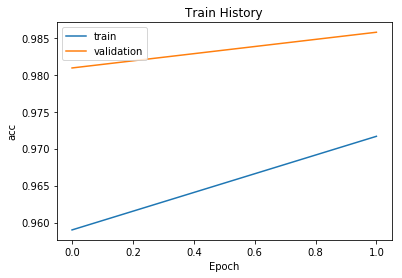

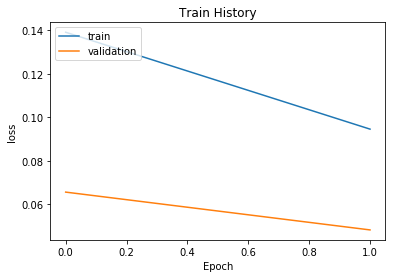

10000/10000 [==============================] - 2s 189us/step

	[Info] Accuracy of testing data = 98.6%
	[Info] Making prediction of X_Test4D_norm

	[Info] Show 10 prediction result (From 240):
[4 1 9 5 7 7 2 8 2 0]

	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        974     0     0     0    0    0    2     1    3    0
1          0  1125     2     2    0    1    2     1    2    0
2          2     0  1018     5    0    0    0     3    4    0
3          0     0     0  1004    0    3    0     1    2    0
4          0     0     2     0  968    0    2     1    2    7
5          2     0     0     3    0  883    2     0    0    2
6          4     2     0     0    1    3  945     0    3    0
7          1     1     6     5    0    0    0  1011    1    3
8          4     0     4     2    1    1    1     2  957    2
9          4     3     1     6    5    4    0     5    3  978



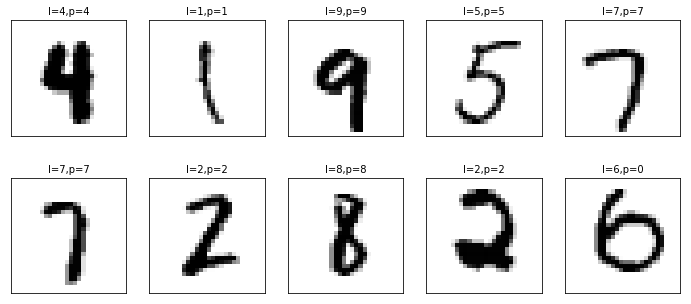

In [9]:
import matplotlib.pyplot as plt  
import tensorflow as tf

def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 
    
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
plt.show()  

show_train_history(train_history, 'acc', 'val_acc')  
show_train_history(train_history, 'loss', 'val_loss') 

scores = model.evaluate(X_Test4D_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))   

print("\t[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test4D_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[250:260]))
plot_images_labels_predict(X_Test, y_Test, prediction, idx=250)  
import pandas as pd
print("\t[Info] Display Confusion Matrix:")
print("%s\n" % pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict']))

## STEP7. 匯出模型

In [10]:
model.save_weights('/tmp/CNN_Mnist.h5')

## STEP8. 讀取模型

In [11]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D 

model.load_weights('/tmp/CNN_Mnist.h5')

## STEP9. 測試模型

10000/10000 [==============================] - 2s 182us/step

	[Info] Accuracy of testing data = 98.6%
	[Info] Making prediction of X_Test4D_norm

	[Info] Show 10 prediction result (From 240):
[4 1 9 5 7 7 2 8 2 0]

	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        974     0     0     0    0    0    2     1    3    0
1          0  1125     2     2    0    1    2     1    2    0
2          2     0  1018     5    0    0    0     3    4    0
3          0     0     0  1004    0    3    0     1    2    0
4          0     0     2     0  968    0    2     1    2    7
5          2     0     0     3    0  883    2     0    0    2
6          4     2     0     0    1    3  945     0    3    0
7          1     1     6     5    0    0    0  1011    1    3
8          4     0     4     2    1    1    1     2  957    2
9          4     3     1     6    5    4    0     5    3  978



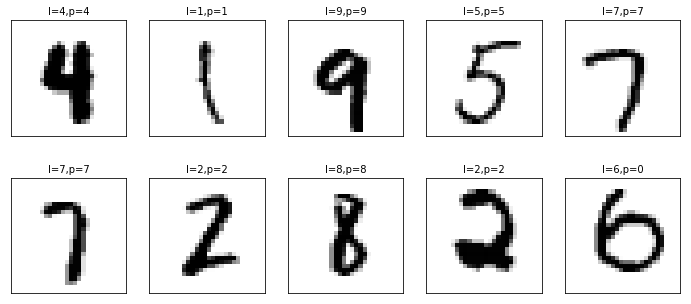

In [12]:
import matplotlib.pyplot as plt  
import tensorflow as tf

def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 
    
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
plt.show()  

scores = model.evaluate(X_Test4D_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))   

print("\t[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test4D_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[250:260]))
plot_images_labels_predict(X_Test, y_Test, prediction, idx=250)  
import pandas as pd
print("\t[Info] Display Confusion Matrix:")
print("%s\n" % pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict']))